In [1]:
import os #Definir el directorio de trabajo
os.chdir(r'E:\Estudio\Big_Data_Python\Aplicando_WEB_SCRAPING')
os.getcwd() #conocer el directorio de trabajo

'E:\\Estudio\\Big_Data_Python\\Aplicando_WEB_SCRAPING'

In [2]:
from selenium import webdriver
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import random
import time

In [3]:
from selenium.webdriver.chrome.service import Service as ChromeService

# Configurar el driver (asumiendo que binary_path está definido en otro lugar)
svc = webdriver.ChromeService(executable_path=binary_path)
driver = webdriver.Chrome(service=svc)
url = "https://siea.midagri.gob.pe/portal/calendario/#"
driver.get(url)

In [32]:
# Seleccionar Maiz Amarillo Duro
dropdown = WebDriverWait(driver, 20).until(
    EC.element_to_be_clickable((By.CSS_SELECTOR, "span.select2-selection.select2-selection--single"))
)
dropdown.click()

search_box = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "input.select2-search__field"))
)
search_box.clear()
search_box.send_keys("Maiz Amarillo Duro")
time.sleep(1)
search_box.send_keys(Keys.RETURN)

# Hacer click en el botón "cosecha" usando el ID correcto
cosecha_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "btnCosecha"))
)
cosecha_button.click()
time.sleep(2)

# Para dibujar al cuadro con puntos

In [6]:
from visual_markers import visualizar_mapa_grid

# Después de navegar a la página del mapa:
visualizar_mapa_grid(driver, 150, 150, 600, 700, 15)

Visualizando área: X(150-600), Y(150-700) con cuadrícula 15x15
Visualización completada: 225 puntos dibujados


True

# Busqueda aleatoria (ORIGINAL)

In [16]:
try:
    # Crear objeto ActionChains para el hover
    action = ActionChains(driver)
    
    # Conjunto para almacenar departamentos únicos
    departamentos_encontrados = set()
    
    # Lista de todos los departamentos que deberíamos encontrar
    todos_departamentos = {
        'Amazonas', 'Áncash', 'Apurímac', 'Arequipa', 'Ayacucho', 'Cajamarca',
        'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad',
        'Lambayeque', 'Lima', 'Loreto', 'Madre De Dios', 'Moquegua', 'Pasco',
        'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali'
    }
    
    print("Identificando departamentos...")
    print("-" * 30)
    
    max_intentos = 1000
    intento = 0
    
    while len(departamentos_encontrados) < 24 and intento < max_intentos:
        # Encontrar todos los elementos del mapa
        departments = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "path.highcharts-point"))
        )
        
        # Seleccionar un elemento aleatorio para mayor cobertura
        for department in random.sample(departments, len(departments)):
            try:
                # Mover el cursor sobre el elemento
                action.move_to_element(department).perform()
                time.sleep(0.2)
                
                # Obtener el tooltip
                tooltip = WebDriverWait(driver, 2).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".highcharts-tooltip"))
                )
                
                # Extraer el nombre del departamento
                nombre_departamento = tooltip.text.strip()
                
                # Agregar al conjunto si es nuevo
                if nombre_departamento not in departamentos_encontrados:
                    departamentos_encontrados.add(nombre_departamento)
                    print(f"Departamento encontrado: {nombre_departamento}")
                    
                    # Mostrar departamentos faltantes
                    faltantes = todos_departamentos - departamentos_encontrados
                    if faltantes:
                        print(f"Faltan: {sorted(faltantes)}")
                        print(f"Progreso: {len(departamentos_encontrados)}/24")
                        print("-" * 30)
                    
            except Exception as e:
                continue
        
        intento += 1
    
    # Imprimir resumen final
    print("\nResumen final:")
    print(f"Total de departamentos encontrados: {len(departamentos_encontrados)}")
    print("\nLista completa de departamentos encontrados:")
    for i, dept in enumerate(sorted(departamentos_encontrados), 1):
        print(f"{i}. {dept}")
    
    # Verificar si faltó algún departamento
    faltantes = todos_departamentos - departamentos_encontrados
    if faltantes:
        print("\nDepartamentos no encontrados:")
        for dept in sorted(faltantes):
            print(f"- {dept}")

except Exception as e:
    print(f"Error general: {str(e)}")
finally:
    time.sleep(2)
    print("driver.quit()")

Identificando departamentos...
------------------------------
Departamento encontrado: Apurímac
Faltan: ['Amazonas', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre De Dios', 'Moquegua', 'Pasco', 'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali', 'Áncash']
Progreso: 1/24
------------------------------
Departamento encontrado: Piura
Faltan: ['Amazonas', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre De Dios', 'Moquegua', 'Pasco', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali', 'Áncash']
Progreso: 2/24
------------------------------
Departamento encontrado: Junín
Faltan: ['Amazonas', 'Arequipa', 'Ayacucho', 'Cajamarca', 'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'La Libertad', 'Lambayeque', 'Lima', 'Loreto', 'Madre De Dios', 'Moquegua', 'Pasco', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 

# Busqueda sistematica (sin libreria)

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageGrab
import cv2

# Configuración de parámetros
X_MIN = 450  # Esquina superior izquierda X de donde empieza ancho
Y_MIN = 230  # Esquina superior izquierda Y de donde empieza alto
X_MAX = 850  # Esquina inferior derecha X de la distancia del ANCHO
Y_MAX = 850  # Esquina inferior derecha Y
FILAS = 20     # Número de filas de la cuadrícula
COLUMNAS = 20  # Número de columnas de la cuadrícula

def visualizar_puntos_mapa(x_min, y_min, x_max, y_max, filas, columnas):
    """
    Visualiza los puntos donde se posicionará el cursor en el mapa
    """
    # Tomar screenshot de la pantalla
    screenshot = ImageGrab.grab()
    screenshot = np.array(screenshot)
    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2BGR)
    
    # Dibujar rectángulo del área de trabajo
    cv2.rectangle(screenshot, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    
    # Calcular tamaño de cada celda
    ancho_celda = (x_max - x_min) / columnas
    alto_celda = (y_max - y_min) / filas
    
    # Dibujar puntos en cada intersección
    puntos = []
    for fila in range(filas + 1):
        for columna in range(columnas + 1):
            x = int(x_min + columna * ancho_celda)
            y = int(y_min + fila * alto_celda)
            cv2.circle(screenshot, (x, y), 5, (0, 0, 255), -1)
            puntos.append((x, y))
    
    # Mostrar imagen con matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(screenshot, cv2.COLOR_BGR2RGB))
    plt.title('Puntos de intersección en el mapa')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('mapa_puntos.png')
    plt.show()
    
    return puntos

def simular_hover(driver, x, y):
    """Función simplificada para simular hover en una posición específica"""
    driver.execute_script(f"""
        // Crear y disparar eventos de ratón
        var elemento = document.elementFromPoint({x}, {y});
        if (elemento) {{
            ['mousemove', 'mouseover', 'mouseenter'].forEach(function(eventType) {{
                var evento = new MouseEvent(eventType, {{
                    view: window, bubbles: true, cancelable: true,
                    clientX: {x}, clientY: {y}
                }});
                elemento.dispatchEvent(evento);
            }});
        }}
    """)

def generar_mapa_resultados(x_min, y_min, x_max, y_max, filas, columnas, mapa_resultados, puntos_visitados):
    """
    Genera una visualización de los resultados obtenidos
    
    Args:
        puntos_visitados: conjunto de tuplas (fila, columna) que indica puntos donde se posicionó el cursor
    """
    # Tomar screenshot para usar como fondo
    screenshot = ImageGrab.grab()
    screenshot = np.array(screenshot)
    screenshot = cv2.cvtColor(screenshot, cv2.COLOR_RGB2BGR)
    
    # Crear una imagen más grande para incluir las etiquetas
    altura, anchura = screenshot.shape[:2]
    imagen_resultado = np.zeros((altura + 200, anchura, 3), dtype=np.uint8)
    imagen_resultado[:altura, :] = screenshot
    imagen_resultado[altura:, :] = (255, 255, 255)  # Fondo blanco para las etiquetas
    
    # Dibujar rectángulo del área de trabajo
    cv2.rectangle(imagen_resultado, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)
    
    # Calcular tamaño de cada celda
    ancho_celda = (x_max - x_min) / columnas
    alto_celda = (y_max - y_min) / filas
    
    # Dibujar puntos y etiquetas
    for fila in range(filas + 1):
        for columna in range(columnas + 1):
            x = int(x_min + columna * ancho_celda)
            y = int(y_min + fila * alto_celda)
            
            # Obtener el departamento para esta posición
            departamento = mapa_resultados.get((fila, columna))
            
            # Verificar si el punto fue visitado (cursor pasó por ahí)
            punto_visitado = (fila, columna) in puntos_visitados
            
            # Color del punto según si se encontró un departamento y si fue visitado
            if departamento:
                # Verde si se encontró departamento
                cv2.circle(imagen_resultado, (x, y), 5, (0, 255, 0), -1)
                
                # Añadir etiqueta pequeña sobre el punto
                cv2.putText(
                    imagen_resultado,
                    departamento[:4],  # Primeras 4 letras para no sobrecargar la imagen
                    (x + 5, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.4,
                    (0, 0, 0),
                    1
                )
            elif punto_visitado:
                # Amarillo si fue visitado pero no se encontró departamento
                cv2.circle(imagen_resultado, (x, y), 5, (0, 255, 255), -1)
            else:
                # Rojo si no fue visitado
                cv2.circle(imagen_resultado, (x, y), 5, (0, 0, 255), -1)
            
            # Añadir etiqueta detallada en la parte inferior
            if departamento:
                y_pos = altura + 20 + ((fila * (columnas + 1) + columna) % 10) * 18
                x_pos = 10 + ((fila * (columnas + 1) + columna) // 10) * 250
                cv2.putText(
                    imagen_resultado, 
                    f"({columna},{fila}): {departamento}", 
                    (x_pos, y_pos), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0, 0, 0), 
                    1
                )
    
    # Guardar imagen
    cv2.imwrite('resultados_mapa.png', imagen_resultado)
    
    # Mostrar con matplotlib
    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(imagen_resultado, cv2.COLOR_BGR2RGB))
    plt.title('Resultados del mapeo de departamentos')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('resultados_mapa_plt.png')
    plt.show()
    
    return imagen_resultado

def scrape_departamentos_peru(driver, x_min, y_min, x_max, y_max, filas=4, columnas=4, mostrar_visualizacion=True):
    """
    Función principal para extraer nombres de departamentos del mapa
    usando posiciones definidas en una cuadrícula sin usar el cursor físico
    """
    # Lista de todos los departamentos que deberíamos encontrar
    todos_departamentos = {
        'Amazonas', 'Áncash', 'Apurímac', 'Arequipa', 'Ayacucho', 'Cajamarca',
        'Cusco', 'Huancavelica', 'Huánuco', 'Ica', 'Junín', 'La Libertad',
        'Lambayeque', 'Lima', 'Loreto', 'Madre De Dios', 'Moquegua', 'Pasco',
        'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes', 'Ucayali'
    }
    
    # Conjunto para almacenar departamentos encontrados
    departamentos_encontrados = set()
    
    # Mapeo para guardar qué departamento se encontró en cada posición
    mapa_resultados = {}
    
    # Conjunto para registrar qué puntos fueron visitados por el cursor
    puntos_visitados = set()
    
    # Visualizar puntos si se solicita
    if mostrar_visualizacion:
        visualizar_puntos_mapa(x_min, y_min, x_max, y_max, filas, columnas)
    
    # Calcular tamaño de cada celda
    ancho_celda = (x_max - x_min) / columnas
    alto_celda = (y_max - y_min) / filas
    
    # Generar lista de puntos
    puntos = []
    for fila in range(filas + 1):
        for columna in range(columnas + 1):
            x = int(x_min + columna * ancho_celda)
            y = int(y_min + fila * alto_celda)
            puntos.append((x, y, fila, columna))
    
    # Variable para llevar un seguimiento del tooltip anterior
    ultimo_tooltip = None
    
    # Para cada punto de la cuadrícula
    for x, y, fila, columna in puntos:
        try:
            # Marcar este punto como visitado
            puntos_visitados.add((fila, columna))
            
            # Simular hover en la posición actual
            simular_hover(driver, x, y)
            
            # Esperar a que aparezca el tooltip
            time.sleep(2.0)  # Aumentado a 2 segundos
            
            # Intentar obtener el tooltip con la clase correcta
            try:
                tooltip = WebDriverWait(driver, 1).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".highcharts-tooltip"))
                )
                
                nombre_departamento = tooltip.text.strip()
                
                # Verificar si el tooltip es el mismo que el anterior (no ha cambiado)
                if nombre_departamento == ultimo_tooltip:
                    # Si es el mismo, no registrar nada para este punto
                    mapa_resultados[(fila, columna)] = None
                    continue
                
                # Actualizar el tooltip más reciente
                ultimo_tooltip = nombre_departamento
                
                # Verificar si se encontró un departamento válido
                if nombre_departamento and nombre_departamento in todos_departamentos:
                    # Guardar el departamento y su posición
                    mapa_resultados[(fila, columna)] = nombre_departamento
                    
                    # Agregar al conjunto si es nuevo
                    if nombre_departamento not in departamentos_encontrados:
                        departamentos_encontrados.add(nombre_departamento)
                else:
                    # No es un departamento válido, marcar como None
                    mapa_resultados[(fila, columna)] = None
                        
            except Exception:
                # No se encontró tooltip, asegurarse de que se marca como None
                mapa_resultados[(fila, columna)] = None
                # Resetear el último tooltip para evitar arrastrar valores
                ultimo_tooltip = None
            
        except Exception:
            # Error al procesar el punto, marcar como None
            mapa_resultados[(fila, columna)] = None
            # Resetear el último tooltip para evitar arrastrar valores
            ultimo_tooltip = None
    
    # Generar mapa visual de resultados, pasando también los puntos visitados
    generar_mapa_resultados(x_min, y_min, x_max, y_max, filas, columnas, mapa_resultados, puntos_visitados)
    
    # Imprimir resumen final
    print("\n===== RESUMEN FINAL =====")
    print(f"Total de departamentos encontrados: {len(departamentos_encontrados)}/{len(todos_departamentos)}")
    
    print("\nLista de departamentos encontrados:")
    for i, dept in enumerate(sorted(departamentos_encontrados), 1):
        print(f"{i}. {dept}")
    
    # Verificar si faltó algún departamento
    faltantes = todos_departamentos - departamentos_encontrados
    if faltantes:
        print("\nDepartamentos no encontrados:")
        for dept in sorted(faltantes):
            print(f"- {dept}")
    
    return departamentos_encontrados, mapa_resultados

# Ejemplo de uso
"""
# Inicializa tu driver y navega a la página
driver = webdriver.Chrome()
driver.get("https://siea.midagri.gob.pe/portal/calendario/")

# Llama a la función con tu driver ya inicializado
departamentos, mapa = scrape_departamentos_peru(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)
"""

'\n# Inicializa tu driver y navega a la página\ndriver = webdriver.Chrome()\ndriver.get("https://siea.midagri.gob.pe/portal/calendario/")\n\n# Llama a la función con tu driver ya inicializado\ndepartamentos, mapa = scrape_departamentos_peru(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)\n'

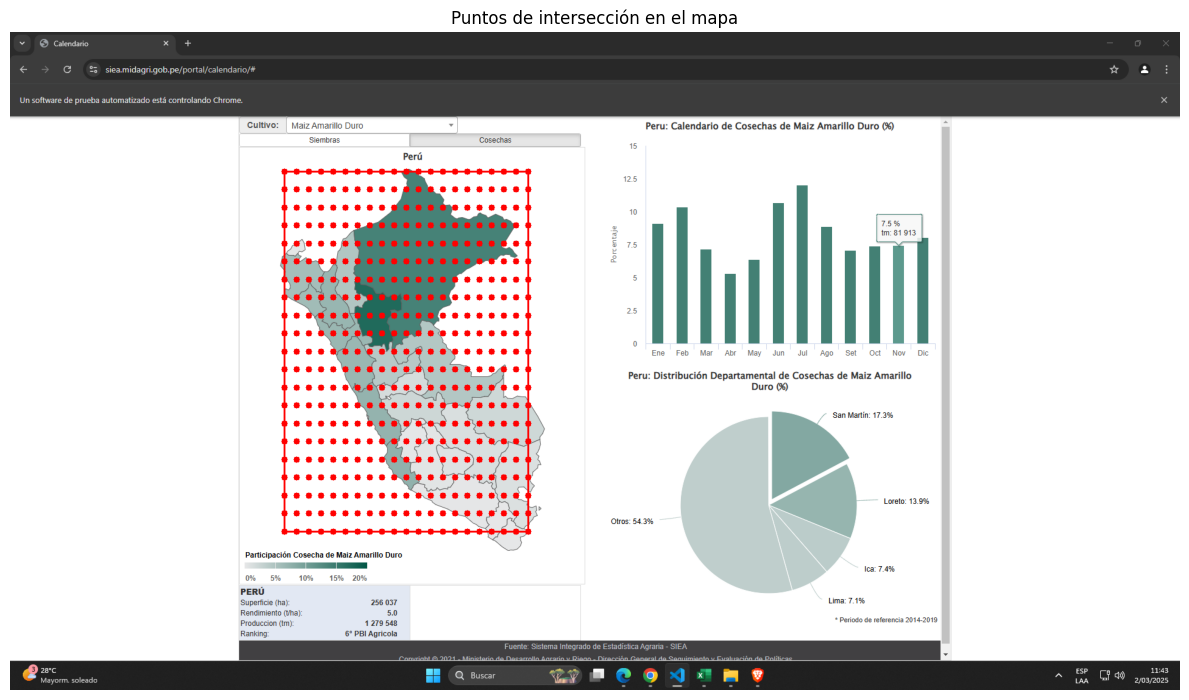

KeyboardInterrupt: 

In [26]:
# Llama a la función con tu driver ya inicializado
departamentos, mapa = scrape_departamentos_peru(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)

In [38]:
def scrape_tooltips_mapa(driver, x_min, y_min, x_max, y_max, filas=20, columnas=20, mostrar_visualizacion=True):
    """
    Función para extraer nombres de elementos desde tooltips en mapas web
    sin necesidad de tener una lista previa para validar
    """
    import time
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    
    # Conjunto para almacenar tooltips encontrados (elimina duplicados automáticamente)
    tooltips_encontrados = set()
    
    # Mapeo para guardar qué tooltip se encontró en cada posición
    mapa_resultados = {}
    
    # Conjunto para registrar qué puntos fueron visitados por el cursor
    puntos_visitados = set()
    
    # Visualizar puntos si se solicita
    if mostrar_visualizacion:
        visualizar_puntos_mapa(x_min, y_min, x_max, y_max, filas, columnas)
    
    # Calcular tamaño de cada celda
    ancho_celda = (x_max - x_min) / columnas
    alto_celda = (y_max - y_min) / filas
    
    # Generar lista de puntos
    puntos = []
    for fila in range(filas + 1):
        for columna in range(columnas + 1):
            x = int(x_min + columna * ancho_celda)
            y = int(y_min + fila * alto_celda)
            puntos.append((x, y, fila, columna))
    
    # Variable para llevar un seguimiento del tooltip anterior
    ultimo_tooltip = None
    
    print("Iniciando captura de tooltips...")
    
    # Para cada punto de la cuadrícula
    for x, y, fila, columna in puntos:
        try:
            # Marcar este punto como visitado
            puntos_visitados.add((fila, columna))
            
            # Simular hover en la posición actual
            simular_hover(driver, x, y)
            
            # Esperar a que aparezca el tooltip
            time.sleep(1.0)  # Puedes ajustar este tiempo según la respuesta del sitio
            
            # Intentar obtener el tooltip
            # Intenta con varias clases comunes de tooltips
            tooltip_selectors = [
                ".highcharts-tooltip",  # Selector del código original
                "[role='tooltip']",     # Común en muchos mapas
                ".tooltip",             # Clase común
                ".mapTooltip",          # Otra clase común
                ".map-tooltip"          # Variante con guión
            ]
            
            tooltip_text = None
            
            for selector in tooltip_selectors:
                try:
                    tooltip = WebDriverWait(driver, 0.5).until(
                        EC.presence_of_element_located((By.CSS_SELECTOR, selector))
                    )
                    tooltip_text = tooltip.text.strip()
                    if tooltip_text:  # Si encontramos texto, salimos del bucle
                        break
                except Exception:
                    continue
            
            # Verificar si se encontró un tooltip válido
            if tooltip_text and tooltip_text != ultimo_tooltip:
                # Actualizar el tooltip más reciente
                ultimo_tooltip = tooltip_text
                
                # Limpieza básica del texto (puedes ajustar según necesites)
                cleaned_text = tooltip_text.strip()
                
                # Guardar el tooltip y su posición
                mapa_resultados[(fila, columna)] = cleaned_text
                
                # Agregar al conjunto si es nuevo
                tooltips_encontrados.add(cleaned_text)
                
                print(f"Encontrado en ({fila},{columna}): {cleaned_text}")
            else:
                # No es un tooltip válido o es repetido, marcar como None
                mapa_resultados[(fila, columna)] = None
                        
        except Exception as e:
            print(f"Error al procesar punto ({fila},{columna}): {e}")
            # Error al procesar el punto, marcar como None
            mapa_resultados[(fila, columna)] = None
            # Resetear el último tooltip para evitar arrastrar valores
            ultimo_tooltip = None
    
    # Generar mapa visual de resultados, pasando también los puntos visitados
    generar_mapa_resultados(x_min, y_min, x_max, y_max, filas, columnas, mapa_resultados, puntos_visitados)
    
    # Imprimir resumen final
    print("\n===== RESUMEN FINAL =====")
    print(f"Total de tooltips encontrados: {len(tooltips_encontrados)}")
    
    print("\nLista de tooltips encontrados:")
    for i, tooltip in enumerate(sorted(tooltips_encontrados), 1):
        print(f"{i}. {tooltip}")
    
    # Guardar en un archivo CSV
    import csv
    with open('tooltips_encontrados.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Número', 'Tooltip'])
        for i, tooltip in enumerate(sorted(tooltips_encontrados), 1):
            writer.writerow([i, tooltip])
    
    print("\nLos resultados han sido guardados en 'tooltips_encontrados.csv'")
    
    return tooltips_encontrados, mapa_resultados

# Ejemplo de uso
"""
# Inicializa tu driver y navega a la página
driver = webdriver.Chrome()
driver.get("URL_DEL_MAPA")

# Llama a la función con tu driver ya inicializado
tooltips, mapa = scrape_tooltips_mapa(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)
"""

'\n# Inicializa tu driver y navega a la página\ndriver = webdriver.Chrome()\ndriver.get("URL_DEL_MAPA")\n\n# Llama a la función con tu driver ya inicializado\ntooltips, mapa = scrape_tooltips_mapa(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)\n'

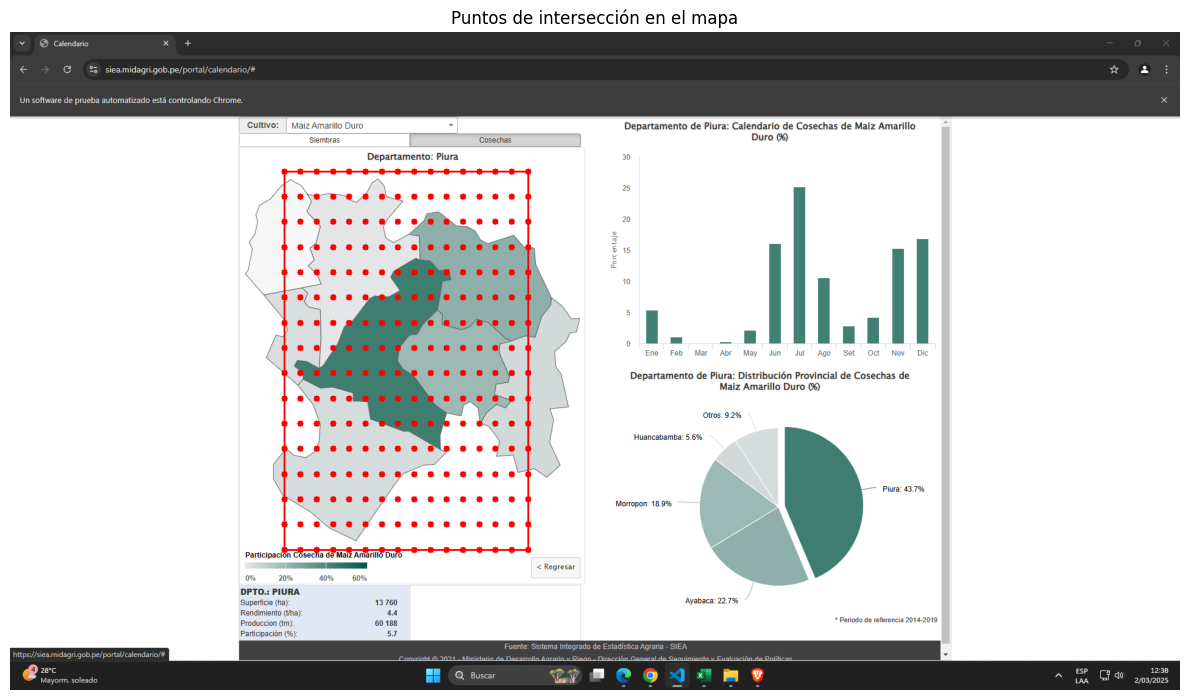

Iniciando captura de tooltips...
Encontrado en (0,2): Huancabamba
Encontrado en (0,3): Sullana
Encontrado en (0,10): Ayabaca
Encontrado en (1,4): Sullana
Encontrado en (1,8): Piura
Encontrado en (1,11): Ayabaca
Encontrado en (2,1): Paita
Encontrado en (2,3): Sullana
Encontrado en (2,6): Piura
Encontrado en (2,11): Ayabaca
Encontrado en (3,2): Paita
Encontrado en (3,4): Sullana
Encontrado en (3,5): Piura
Encontrado en (3,10): Morropon
Encontrado en (3,15): Ayabaca
Encontrado en (4,1): Paita
Encontrado en (4,4): Piura
Encontrado en (4,9): Morropon
Encontrado en (4,15): Huancabamba
Encontrado en (5,2): Paita
Encontrado en (5,3): Piura
Encontrado en (5,10): Morropon
Encontrado en (5,15): Huancabamba
Encontrado en (6,3): Sechura
Encontrado en (6,7): Piura
Encontrado en (6,11): Morropon
Encontrado en (6,14): Huancabamba
Encontrado en (7,4): Sechura
Encontrado en (7,9): Piura
Encontrado en (7,14): Huancabamba
Encontrado en (8,1): Sechura
Encontrado en (9,0): Huancabamba
Encontrado en (9,1): S

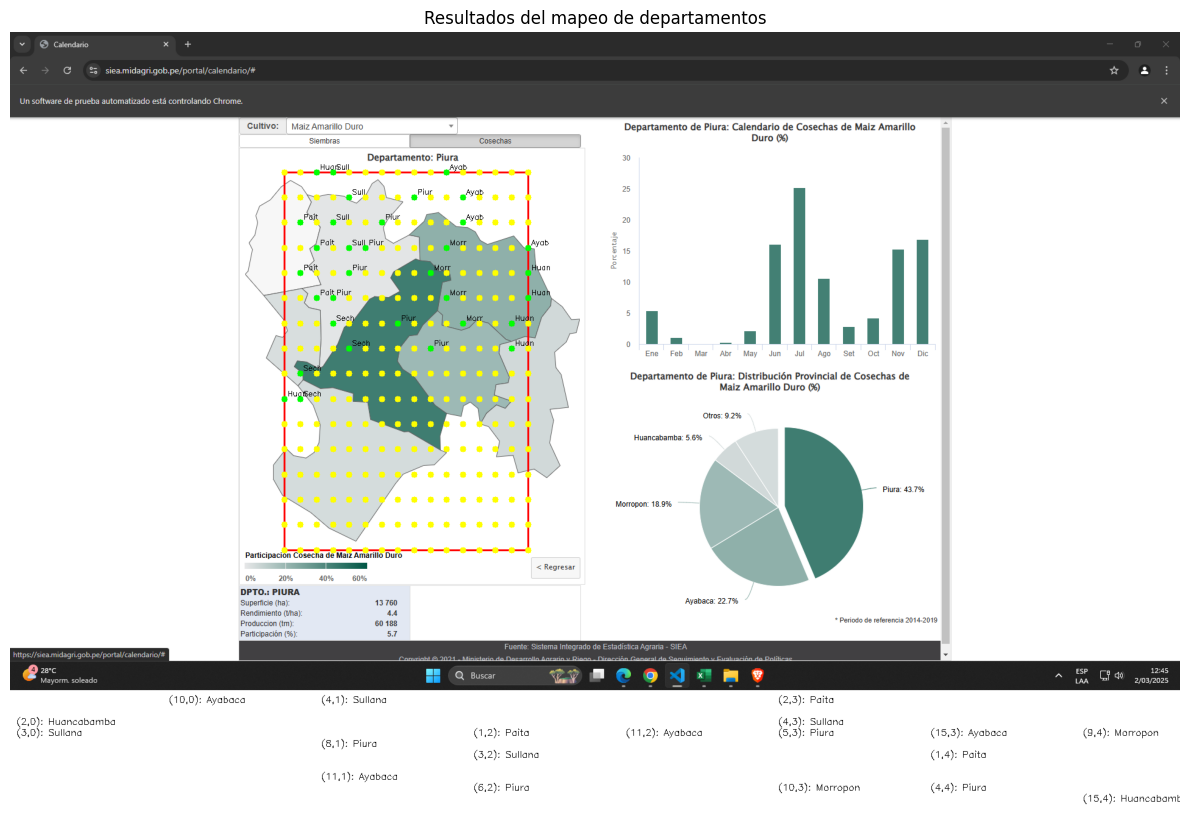


===== RESUMEN FINAL =====
Total de tooltips encontrados: 7

Lista de tooltips encontrados:
1. Ayabaca
2. Huancabamba
3. Morropon
4. Paita
5. Piura
6. Sechura
7. Sullana

Los resultados han sido guardados en 'tooltips_encontrados.csv'


In [39]:
# Llama a la función con tu driver ya inicializado
mapa = scrape_tooltips_mapa(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)

In [34]:
from selenium import webdriver
from scrape_tooltips import scrape_tooltips_mapa

# Configuración de parámetros
x_min = 450
y_min = 230
x_max = 850
y_max = 850
filas = 2
columnas = 2
mostrar_visualizacion = True
segundos_espera = 1.5  # Tiempo de espera para el tooltip

# Llama a la función con tu driver ya inicializado
tooltips, mapa = scrape_tooltips_mapa(driver, x_min, y_min, x_max, y_max, filas, columnas, mostrar_visualizacion, segundos_espera)

Visualizando puntos en el mapa desde (450, 230) hasta (850, 850) con 2 filas y 2 columnas.
Iniciando captura de tooltips...
Error al procesar punto (0,0): Message: move target out of bounds
  (Session info: chrome=133.0.6943.142)
Stacktrace:
	GetHandleVerifier [0x00007FF6FDB06EE5+28773]
	(No symbol) [0x00007FF6FDA725D0]
	(No symbol) [0x00007FF6FD908DDC]
	(No symbol) [0x00007FF6FD9BA679]
	(No symbol) [0x00007FF6FD98724A]
	(No symbol) [0x00007FF6FD9AF6F3]
	(No symbol) [0x00007FF6FD987023]
	(No symbol) [0x00007FF6FD94FF5E]
	(No symbol) [0x00007FF6FD9511E3]
	GetHandleVerifier [0x00007FF6FDE5422D+3490733]
	GetHandleVerifier [0x00007FF6FDE6BA13+3586963]
	GetHandleVerifier [0x00007FF6FDE6144D+3544525]
	GetHandleVerifier [0x00007FF6FDBCC9AA+838442]
	(No symbol) [0x00007FF6FDA7D01F]
	(No symbol) [0x00007FF6FDA795E4]
	(No symbol) [0x00007FF6FDA79786]
	(No symbol) [0x00007FF6FDA68CB9]
	BaseThreadInitThunk [0x00007FFA8066E8D7+23]
	RtlUserThreadStart [0x00007FFA81D7BF6C+44]

Error al procesar punto

In [ ]:
# Llama a la función con tu driver ya inicializado
tooltips, mapa = scrape_tooltips_mapa(driver, X_MIN, Y_MIN, X_MAX, Y_MAX, FILAS, COLUMNAS)

# Nueva version con libreria creada

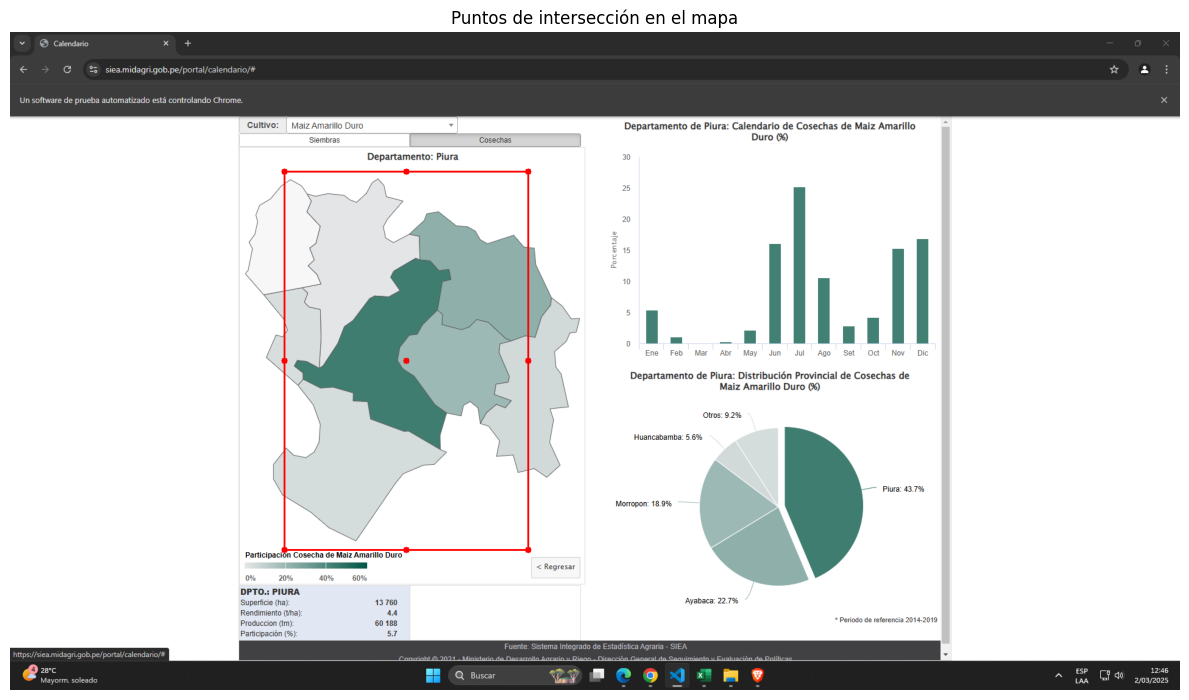

Iniciando captura de tooltips...
Encontrado en (0,1): Sechura
Encontrado en (0,2): Sullana
Encontrado en (1,0): Ayabaca
Encontrado en (1,2): Sechura


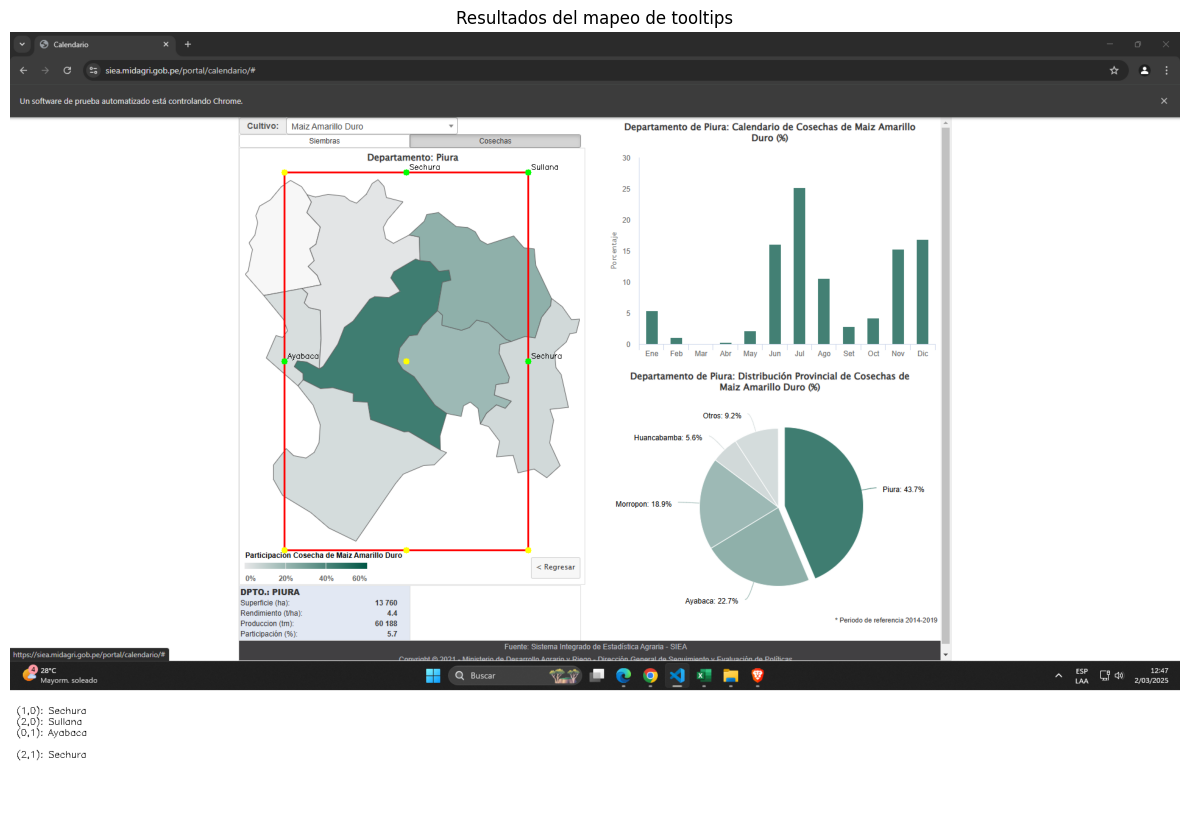


===== RESUMEN FINAL =====
Total de tooltips encontrados: 3

Lista de tooltips encontrados:
1. Ayabaca
2. Sechura
3. Sullana

Los resultados han sido guardados en 'tooltips_encontrados.csv'


In [42]:
from selenium import webdriver
from tooltip_scraper import scrape_tooltips_mapa

tooltips, mapa = scrape_tooltips_mapa(
    driver=driver,
    x_min=450,
    y_min=230,
    x_max=850,
    y_max=850,
    filas=2,
    columnas=2,
    mostrar_visualizacion=True,
    tiempo_espera=2.0
)